# Scikit-Learn: un API de python para el aprendizaje automatico

Scikit-Learn, libreria de python, combina una interfaz intuitiva con una implementacion altamente optimizada de varios algoritmos de clasificacion y regresion. No solo ofrece una amplia variedad de algoritmos de aprendizaje, sino tambien diferentes funciones sencillas para el preprocesamiento de datos y para la evaluacion de los modelos.

Los cinco pasos principales que se dan en el entrenamiento de un algoritmo de aprendizaje automatica se pueden resumir en:

1. Seleccionar caracteristicas y recopilar muestras de entrenamiento.
2. Elegir una medicion del rendimiento.
3. Eligir un algoritmo optimizador y de clasificacion.
4. Evaluar el rendimiento del modelo.
5. Afinar el algoritmo.

Siempre sera necesario aprender a manejar varios algoritmos de clasificacion, debido a que no todos funcionan de la misma manera ni son aptos para todos los conjuntos de datos; inclusive sus restricciones matematicas suelen ser diferentes, y por, lo tanto pueden producir resultados erroneos de no utilizarse con los datos adecuados. Mas aun, algunos de llos dependen de los llamadas _hiperparametros_ , siendo estos diferentes entre los distintos algoritmos, lo cual implica una dificultad mayor, la cual puede ser subsanada con la practica. 

Para introducirnos adecuadamente en el tema, iniciaremos con la implementacion del modelo **Perceptron** de clasificacion lineal visto la semana pasada, pero esta vez implementado a traves de _scikit learn_. Primero debemos recordar y agregar lo siguiente:

1. El modelo es de clasificacion lineal, lo que significa que tratara de separar las clases por medio de lineas rectas.
2. El modelo, al ser de clasificacion, puede manejar distintas clases, y no solo dos, como se vio en la clase de la semana pasada, en la cual se manejo unicamente clasificacion binaria. Para lograr la clasificacion de mas de dos clases, utilizara un metodo llamada **OvR: One versus All**. 
3. El escalado de variables, que favorecia al metodo del Descenso del gradiente usado en el modelo Adaline, tambien puede ser usado con el modelo del Perceptron a traves de la libreria scikit learn.
4. El modelo de Perceptron requiere para su convergencia que las clases sean linealmente separables, de lo contrario nunca terminar de clasificar. Para solventar esto, se introduce un numero predeterminado de iteraciones y asi asegurar su finalizacion, mas no su convergencia. Es de aclarar que el numero de iteraciones elegido no garantiza que los errores sean minimos, y en clases que no son linealmente separables, puede llegar a ser demandante encontrar este minimo. Esto representa un defecto de la funcion de activacion del Perceptron.

Scikit Learn ademas proporciona acceso a conjuntos de datos precargados, los cuales, por su popularidad, se ganaron su lugar dentro de la libreria. Otra librerias que permiten algo similar son Pandas y Numpy.

In [4]:
# Cargando el conjunto de datos Iris
# =========================================================
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

print(f'Etiquetas de clase: {np.unique(y)}')

Etiquetas de clase: [0 1 2]


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
# Division del conjunto de datos en entrenamiento y test
# =========================================================
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y)

print(f'Tamaño del conjunto X_train: {X_train.shape}')
print(f'Tamaño del conjunto X_test: {X_test.shape}')
print(f'Tamaño del conjunto y_train: {y_train.shape}')
print(f'Tamaño del conjunto y_test: {y_test.shape}')

print(f'\nConteo de etiquetas en y: {np.bincount(y)}')
print(f'Conteo de etiquetas en y_train: {np.bincount(y_train)}')
print(f'Conteo de etiquetas en y_test: {np.bincount(y_test)}')

Tamaño del conjunto X_train: (105, 2)
Tamaño del conjunto X_test: (45, 2)
Tamaño del conjunto y_train: (105,)
Tamaño del conjunto y_test: (45,)

Conteo de etiquetas en y: [50 50 50]
Conteo de etiquetas en y_train: [35 35 35]
Conteo de etiquetas en y_test: [15 15 15]


In [6]:
# Escalado de variables
# =========================================================
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train) # Calculo de mu y sigma para cada caracteristica
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test) # X_test se escala con los mismos parametros de X_train, para que sean comparables 

In [7]:
# Creacion del modelo de perceptron
# =========================================================
from sklearn.linear_model import Perceptron
modelo = Perceptron(max_iter = 40, eta0 = 0.1, random_state = 1)
modelo.fit(X_train_std, y_train)

Perceptron(eta0=0.1, max_iter=40, random_state=1)

In [8]:
# Prediccion de resultados
# =========================================================
y_pred = modelo.predict(X_test_std)
print(f'Valores mal clasificados: {(y_test != y_pred).sum()}')
print(f'Cantidad de valores en y_test: {y_test.shape[0]}')
proporcion = (y_test != y_pred).sum()/y_test.shape[0]
print(f'Proporcion de valores mal clasificados: {np.round(proporcion, 3)}')
print(f'Precision de la clasificacion: {1 - np.round(proporcion, 3)}')

Valores mal clasificados: 4
Cantidad de valores en y_test: 45
Proporcion de valores mal clasificados: 0.089
Precision de la clasificacion: 0.911


In [9]:
# Calculo de la precision usando accuracy_score
# =========================================================
from sklearn.metrics import accuracy_score
print(f'Precision: {np.round(accuracy_score(y_test, y_pred), 3)}')

Precision: 0.911


In [10]:
# Calculo de la precision usando score
# =========================================================
print(f'Precision: {np.round(modelo.score(X_test_std, y_test), 3)}')

Precision: 0.911


In [11]:
# Graficando las regiones
# =========================================================
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

<IPython.core.display.Javascript object>


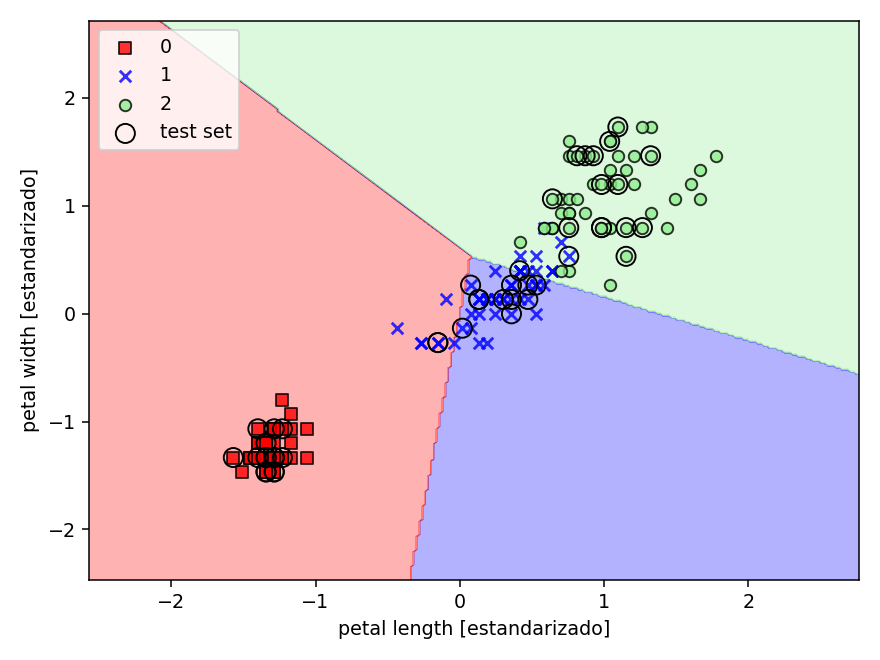

<ipython-input-11-82b7b871b197>:39: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.scatter(X_test[:, 0],


In [12]:
%matplotlib notebook
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=modelo, test_idx=range(105, 150))
plt.xlabel('petal length [estandarizado]')
plt.ylabel('petal width [estandarizado]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

<span class="burk">EJERCICIO</span>

1. Volver a usar el modelo de Perceptron con todas las caracteristicas del dataset. Calcular la precision.
2. Tomar el dataset `Social_Network_Ads.csv` y clasificar los datos de compra y no compra usando las variables 'Age' y 'EstimatedSalary'. Calcular el score y graficar para visualizar las regiones.

# Regresion Logistica

La regresion logistica es uno de los algoritmos de clasificacion mas populares, que no se usa para regresion, como su nombre pareciera indicar. Su metodo se basa en el establecimiento de probabilidades a partir de un valor de entra da de red $z$, el cual se representa de forma lineal, como en el caso del perceptron:

$$z=w_0+w_1x_1+w_2x_x+\dots+w_mx_m$$

Por lo tanto, la regresion logistica tambien es un algoritmo de clasificacion lineal, que tratara de separar las clases por un limite o frentera lineal; su ventaja sobre el modelo de Perceptron es similar a la ventaja mostrada por Adaline, la cual es la posibilidad de hallar un minimo de la funcion de costo sin depender de la convergencia del algoritmo; recordemos que Perceptron es un modelo que depende la separacion lineal de clases para su convergencia, lo cual es una limitante del modelo.

La definicion matematica de la regresion logistica es:

$$\phi(z)=\frac{1}{1+e^{-z}}$$

Para entender mejor como funciona, vamos a graficar su forma en python:

<IPython.core.display.Javascript object>


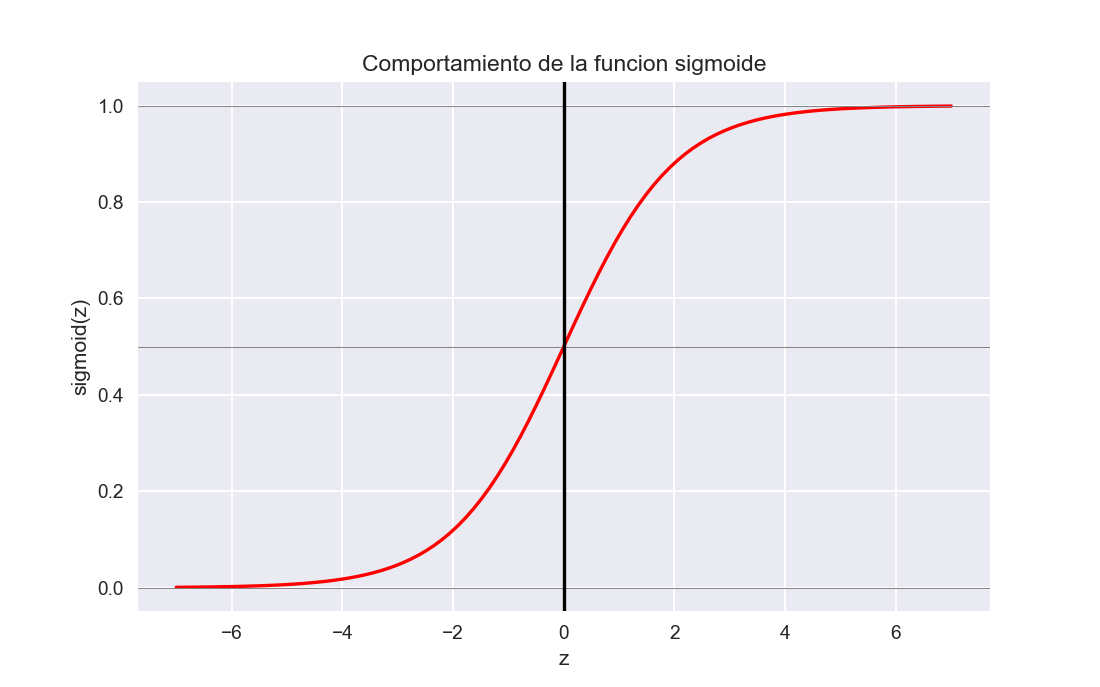

In [13]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
%matplotlib notebook

def sigmoid(z):
    return 1./(1.+np.exp(-z))

x = np.linspace(-7, 7, 100)
y = sigmoid(x)

fig, ax = plt.subplots(figsize = (8, 5))
ax.plot(x, y, color = 'red')
plt.axhline(y = 0.5, color = 'gray', linewidth = 0.5)
plt.axhline(y = 1, color = 'gray', linewidth = 0.5)
plt.axhline(y = 0, color = 'gray', linewidth = 0.5)
plt.axvline(x = 0, color = 'k')

ax.set_xlabel('z')
ax.set_ylabel('sigmoid(z)')
ax.set_title('Comportamiento de la funcion sigmoide');

Como se puede ver, a medida que x se acrca a infinito, la funcion se acerca a 1; cuando la funcion se acerca a menos infinito, la funcion se acerca a -1. La funcion se puede entender como que toma valores numero numericos en el intervalo $(-\infty, \infty)$ y los transforma al intervalo $[0, 1]$. 

###### Comparacion entre Adaline y Regresion logistica

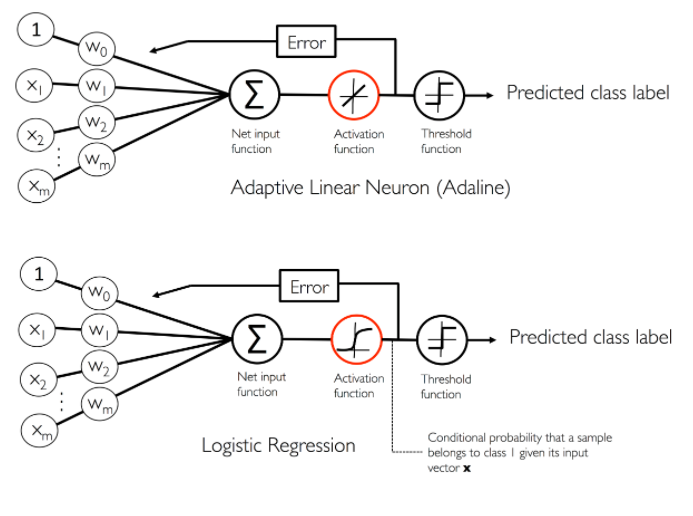

La salida de la funcion sigmoide se lee como: La probabilidad de que la muestra pertenezca a la clase 1, dados los valores $\vec{x}$ y $\vec{w}$ de entrada. En terminos mas formales, se escribe como $P(y=1|\vec{x},\vec{w})$. Por ejemplo, si $\phi(z)=0.8$, significa que la probabilidad de que la flor de entrada sea `Iris-versicolor` (etiqueta 1) es del 80%, y por lo tanto la probabilidad de que se `Iris-Setosa` es del 20%.

Lo interesante de la regresion logistica es que no solo brinda la etiqueta de clase, sino que ademas brinda la probabilidad de esta etiqueta sea la correcta; por esta razon es bastante popular en calculos meteorologicos y en medicina.

La probabilidad predicha se puede, simplemete, convertir despues en un resultado binario mediante la funcion umbral:

\begin{equation}
     \hat{y} = \left\{
	       \begin{array}{ll}
		 1      & \mathrm{si\ } \phi(z) \geq 0.5 \\
		 0 & \text{en otros casos}
	       \end{array}
	     \right.
   \end{equation}
   
Tambien, a partir del grafico, se puede deducir que:

\begin{equation}
     \hat{y} = \left\{
	       \begin{array}{ll}
		 1      & \mathrm{si\ } z \geq 0.0 \\
		 0 & \text{en otros casos}
	       \end{array}
	     \right.
   \end{equation}

## Aprender los pesos para la funcion logistica


Para aprender los pesos, haremos uso de la tecnica de maximizacion de la funcion de coste apropiada para la regresion logistica:

$$J(\textbf{w})=\sum_{i=1}^n \big [-y^{(i)}\log(\phi(z^{(i)}))-(1-y^{(i)})\log(1-\phi(z^{(i)})) \big]$$

Tener en cuenta que la siguiente propiedad se cumple para $J$:

\begin{equation}
     J(\phi(z), y; \textbf{w}) = \left\{
	       \begin{array}{ll}
		 -\log(\phi(z))   & \mathrm{si\ } y = 1 \\
		 -\log(1-\phi(z)) & \mathrm{si\ } y = 0 
	       \end{array}
	     \right.
   \end{equation}

<IPython.core.display.Javascript object>


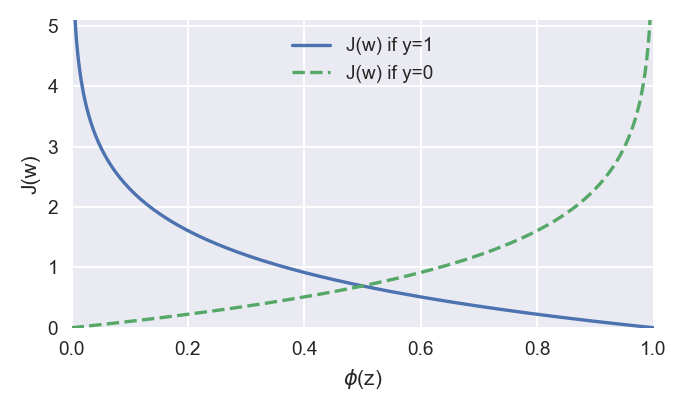

In [14]:
def cost_1(z):
    return - np.log(sigmoid(z))


def cost_0(z):
    return - np.log(1 - sigmoid(z))

z = np.arange(-10, 10, 0.1)
phi_z = sigmoid(z)

fig, ax = plt.subplots(figsize = (5, 3))
c1 = [cost_1(x) for x in z]
plt.plot(phi_z, c1, label='J(w) if y=1')

c0 = [cost_0(x) for x in z]

plt.plot(phi_z, c0, linestyle='--', label='J(w) if y=0')

plt.ylim(0.0, 5.1)
plt.xlim([0, 1])
plt.xlabel('$\phi$(z)')
plt.ylabel('J(w)')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

## Implementando el algoritmo de regresion logistica

In [15]:
class LogisticRegressionGD:
    """Logistic Regression Classifier using gradient descent.

Parametros
    ------------
    eta : float
      Rango de aprendizaje (entre 0.0 1 1.0)
    n_iter : int
      Iteracion sobre el datset de entrenamiento completo.
    random_state : int
      Semilla de numeros aleatorios


    Atributos
    -----------
    w_ : 1d-array
      Pesos de las caracteristicas.
    cost_ : list
      Suma de cuadrados de la funcion de costo en cada epoca.
    """
    
    def __init__(self, eta=0.05, n_iter=100, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit de datos de entrenamiento.

        Parametros
        ----------
        X : {array-like}, shape = [n_samples, n_features]
        y : array-like, shape = [n_samples]

        Returno
        -------
        self : object
        """
        
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()

            cost = -y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output)))
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        """Calcular la entrada de red"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, z):
        """Calcular la activaciond e la funcion sigmoide"""
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

    def predict(self, X):
        """Retornar la etiqueta de clase despues de cada paso"""
        return np.where(self.net_input(X) >= 0.0, 1, 0)


Es importante tener en cuenta que la regresion logistica solo sirve para clasificaciones binarias.

In [16]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

<IPython.core.display.Javascript object>


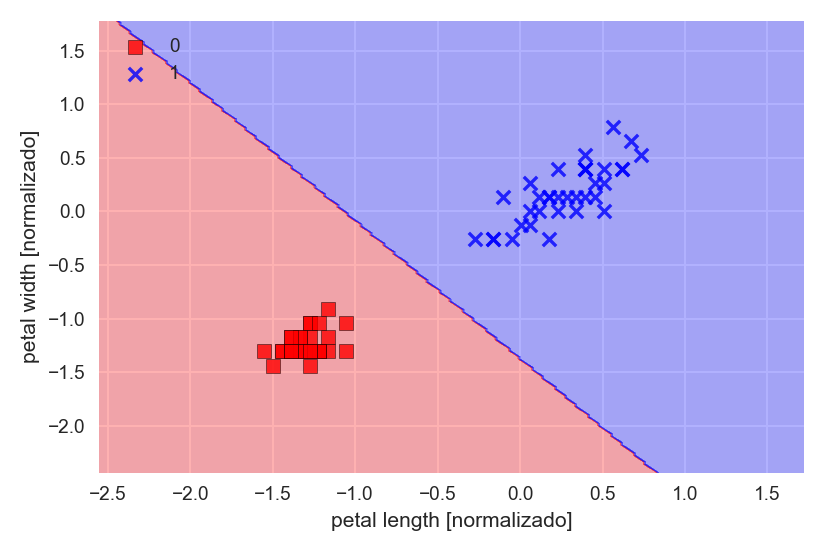

In [17]:
X_train_01_subset = X_train[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]

lrgd = LogisticRegressionGD(eta=0.05, n_iter=1000, random_state=1)
lrgd.fit(X_train_01_subset, y_train_01_subset)

fig, ax = plt.subplots(figsize = (6, 4))

plot_decision_regions(X=X_train_01_subset, y=y_train_01_subset, classifier=lrgd)

plt.xlabel('petal length [normalizado]')
plt.ylabel('petal width [normalizado]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


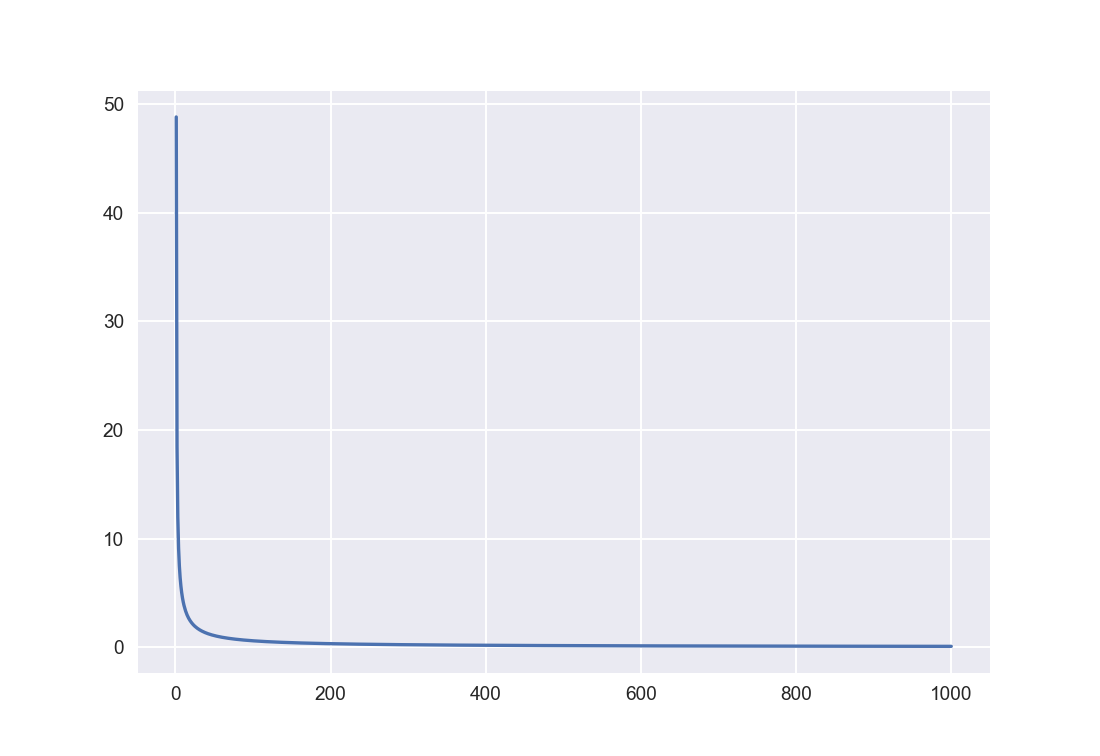

In [24]:
y = lrgd.cost_
x = np.arange(1, len(y)+1)
fig, ax = plt.subplots()
ax.plot(x,y);

<span class="burk">EJERCICIOS</span>

1. Realice la clasificacion de todo el dataset usando la regresion logistica. Compare los resultados con el modelo del perceptron.
2. De nuevo realice el ejericicio 2 pero con esta regresion. Verifique sus resultados y grafique.